In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/8/data

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/8/data


In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM
from tensorflow.keras.models import Sequential

max_features=10000
lenmax=700
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
x_train=sequence.pad_sequences(x_train,maxlen=lenmax)
x_test=sequence.pad_sequences(x_test,maxlen=lenmax)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# 1. sum

In [15]:
from tensorflow.keras.regularizers import l1,l2

m_bd=Sequential()
m_bd.add(Embedding(max_features,32))
m_bd.add(Bidirectional(LSTM(16,dropout=0.5,kernel_regularizer=l2(0.1)),merge_mode='sum'))

m_bd.add(Dense(1, activation='sigmoid'))
m_bd.summary()
m_bd.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=m_bd.fit(x_train,y_train, epochs=20,batch_size=128,validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 16)                6272      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 326,289
Trainable params: 326,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 12s 79ms/step - loss: 3.7732 - acc: 0.6852 - val_loss: 1.0202 - val_acc: 0.8190
Epoch 2/20
157/157 [==============================] - 12s 74ms/step - loss: 0.5765 - acc: 0.8328 - val_loss: 0.4017 - val_acc: 0.8636
Epoch 3/20
157/157 [==============================] - 12s 74ms/step - loss: 0.3717 - acc: 0.8745 - val_loss: 0

In [16]:
test_loss_acc=m_bd.evaluate(x_test,y_test)
print(test_loss_acc)

782/782 [==============================] - 18s 23ms/step - loss: 0.4627 - acc: 0.8660
[0.46270546317100525, 0.8660399913787842]


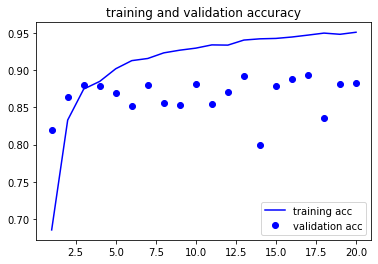

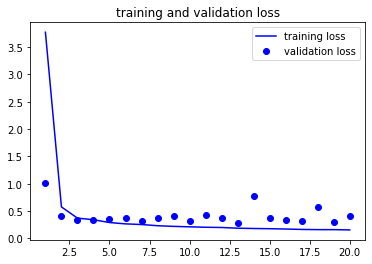

In [17]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
# 2. mul

In [18]:
from tensorflow.keras.regularizers import l1,l2

m_bd=Sequential()
m_bd.add(Embedding(max_features,32))
m_bd.add(Bidirectional(LSTM(16,dropout=0.5,kernel_regularizer=l2(0.1)),merge_mode='mul'))

m_bd.add(Dense(1, activation='sigmoid'))
m_bd.summary()
m_bd.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=m_bd.fit(x_train,y_train, epochs=20,batch_size=128,validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 16)                6272      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 326,289
Trainable params: 326,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 12s 78ms/step - loss: 3.7079 - acc: 0.6792 - val_loss: 1.0591 - val_acc: 0.8004
Epoch 2/20
157/157 [==============================] - 11s 72ms/step - loss: 0.5905 - acc: 0.8259 - val_loss: 0.5332 - val_acc: 0.7832
Epoch 3/20
157/157 [==============================] - 11s 73ms/step - loss: 0.4013 - acc: 0.8598 - val_loss: 0

In [19]:
test_loss_acc=m_bd.evaluate(x_test,y_test)
print(test_loss_acc)

782/782 [==============================] - 18s 23ms/step - loss: 0.4237 - acc: 0.8547
[0.4236714541912079, 0.8546800017356873]


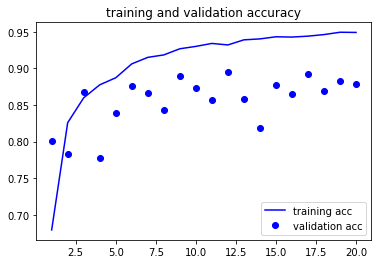

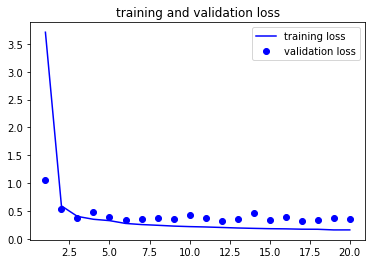

In [20]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
# 3. concat

In [9]:
from tensorflow.keras.regularizers import l1,l2

m_bd=Sequential()
m_bd.add(Embedding(max_features,32))
m_bd.add(Bidirectional(LSTM(16,dropout=0.5,kernel_regularizer=l2(0.1)),merge_mode='concat'))

m_bd.add(Dense(1, activation='sigmoid'))
m_bd.summary()
m_bd.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=m_bd.fit(x_train,y_train, epochs=7,batch_size=128,validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 326,305
Trainable params: 326,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
157/157 [==============================] - 12s 79ms/step - loss: 3.6261 - acc: 0.6683 - val_loss: 1.0341 - val_acc: 0.7144
Epoch 2/7
157/157 [==============================] - 11s 73ms/step - loss: 0.5709 - acc: 0.8292 - val_loss: 0.4251 - val_acc: 0.8524
Epoch 3/7
157/157 [==============================] - 11s 72ms/step - loss: 0.3837 - acc: 0.8694 - val_loss: 0.34

In [10]:
test_loss_acc=m_bd.evaluate(x_test,y_test)
print(test_loss_acc)

782/782 [==============================] - 18s 23ms/step - loss: 0.3280 - acc: 0.8756
[0.3279579281806946, 0.8755999803543091]


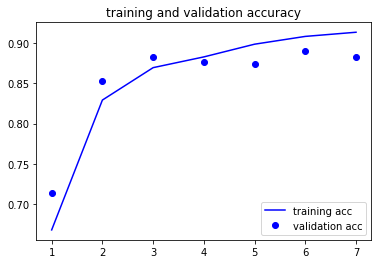

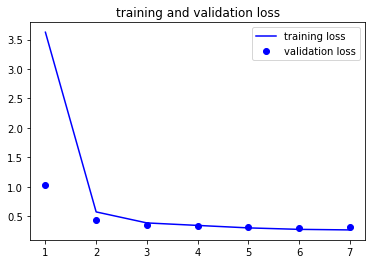

In [11]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
# 4. ave

In [21]:
from tensorflow.keras.regularizers import l1,l2

m_bd=Sequential()
m_bd.add(Embedding(max_features,32))
m_bd.add(Bidirectional(LSTM(16,dropout=0.5,kernel_regularizer=l2(0.1)),merge_mode='ave'))

m_bd.add(Dense(1, activation='sigmoid'))
m_bd.summary()
m_bd.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=m_bd.fit(x_train,y_train, epochs=20,batch_size=128,validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 16)                6272      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 326,289
Trainable params: 326,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 12s 77ms/step - loss: 3.8792 - acc: 0.6553 - val_loss: 1.0926 - val_acc: 0.7786
Epoch 2/20
157/157 [==============================] - 12s 75ms/step - loss: 0.6649 - acc: 0.7725 - val_loss: 0.5336 - val_acc: 0.7912
Epoch 3/20
157/157 [==============================] - 12s 74ms/step - loss: 0.5230 - acc: 0.7916 - val_loss: 0

In [22]:
test_loss_acc=m_bd.evaluate(x_test,y_test)
print(test_loss_acc)

782/782 [==============================] - 19s 24ms/step - loss: 0.3286 - acc: 0.8734
[0.3285558223724365, 0.8733599781990051]


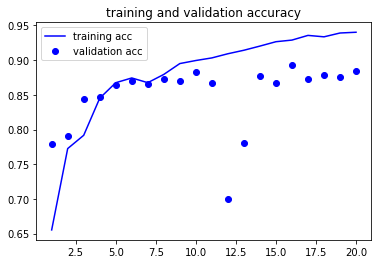

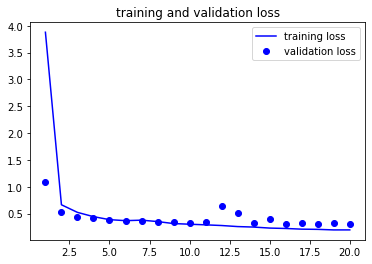

In [23]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()